In [ ]:
#Flickr8K dataset  source
https://keras.io/examples/vision/image_captioning/

# Preprocessing

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
path='/content/drive/MyDrive/Flickr8K_image/'
os.mkdir(path)


/content/drive/MyDrive/Flickr8K_image


In [ ]:
%cd '/content/drive/MyDrive/Flickr8K_image/'

/content/drive/MyDrive/Flickr8K_image


In [ ]:
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip
!unzip -qq ./Flickr8k_Dataset.zip
!unzip -qq ./Flickr8k_text.zip
!rm ./Flickr8k_Dataset.zip ./Flickr8k_text.zip


In [ ]:
IMAGES_PATH = "Flicker8k_Dataset"
SEQ_LENGTH = 25

def load_captions_data(filename):
    """Loads captions (text) data and maps them to corresponding images.

    Args:
        filename: Path to the text file containing caption data.

    Returns:
        caption_mapping: Dictionary mapping image names and the corresponding captions
        text_data: List containing all the available captions
    """

    with open(filename) as caption_file:
        caption_data = caption_file.readlines()
        caption_mapping = {}
        text_data = []
        images_to_skip = set()

        for line in caption_data:
            line = line.rstrip("\n")
            # Image name and captions are separated using a tab
            img_name, caption = line.split("\t")

            # Each image is repeated five times for the five different captions.
            # Each image name has a suffix `#(caption_number)`
            img_name = img_name.split("#")[0]
            img_name = os.path.join(IMAGES_PATH, img_name.strip())

            # We will remove caption that are either too short to too long
            tokens = caption.strip().split()

            if len(tokens) < 5 or len(tokens) > SEQ_LENGTH:
                images_to_skip.add(img_name)
                continue

            if img_name.endswith("jpg") and img_name not in images_to_skip:
                # We will add a start and an end token to each caption
                caption = caption.strip()
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name]+=caption
                else:
                    caption_mapping[img_name] = caption

        for img_name in images_to_skip:
            if img_name in caption_mapping:
                del caption_mapping[img_name]

        return caption_mapping, text_data

# Load the dataset
captions_mapping, text_data = load_captions_data("./Flickr8k.token.txt")

In [ ]:
len(captions_mapping),len(text_data)

(7643, 39073)

In [ ]:
#keys are image names and values are captions
captions_mapping

{'Flicker8k_Dataset/1000268201_693b08cb0e.jpg': 'A child in a pink dress is climbing up a set of stairs in an entry way .A girl going into a wooden building .A little girl climbing into a wooden playhouse .A little girl climbing the stairs to her playhouse .A little girl in a pink dress going into a wooden cabin .',
 'Flicker8k_Dataset/1001773457_577c3a7d70.jpg': 'A black dog and a spotted dog are fightingA black dog and a tri-colored dog playing with each other on the road .A black dog and a white dog with brown spots are staring at each other in the street .Two dogs of different breeds looking at each other on the road .Two dogs on pavement moving toward each other .',
 'Flicker8k_Dataset/1002674143_1b742ab4b8.jpg': 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .A little girl is sitting in front of a large painted rainbow .A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .There is a girl wi

In [ ]:
all_images = list(captions_mapping.keys())
print(len(all_images))

7643


In [ ]:
all_images[:5]

['Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 'Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 'Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 'Flicker8k_Dataset/1003163366_44323f5815.jpg',
 'Flicker8k_Dataset/1007129816_e794419615.jpg']

In [ ]:
import pickle
all_captions = list(captions_mapping.values())
with open('./gmbm_input_flickr/all_captions','wb') as f:
  pickle.dump(all_captions,f)

In [ ]:
print(len(all_captions))

7643


In [ ]:
all_captions[:5]

['A child in a pink dress is climbing up a set of stairs in an entry way .A girl going into a wooden building .A little girl climbing into a wooden playhouse .A little girl climbing the stairs to her playhouse .A little girl in a pink dress going into a wooden cabin .',
 'A black dog and a spotted dog are fightingA black dog and a tri-colored dog playing with each other on the road .A black dog and a white dog with brown spots are staring at each other in the street .Two dogs of different breeds looking at each other on the road .Two dogs on pavement moving toward each other .',
 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .A little girl is sitting in front of a large painted rainbow .A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .There is a girl with pigtails sitting in front of a rainbow painting .Young girl with pigtails painting outside in the grass .',
 'A man lays on a bench while 

In [ ]:
def image_resize(pathname):
  orig_img = cv2.imread(pathname)
  orig_img=orig_img[...,::-1]
  newsize = (224, 224) 
  img = cv2.resize(orig_img, (newsize)) 
  return img

In [ ]:
image_list=[]
i=1
for each_image in all_images:
  img=image_resize(each_image)
  image_list.append(img)
  print("completed image no",i)
  i+=1


Streaming output truncated to the last 5000 lines.
completed image no 2644
completed image no 2645
completed image no 2646
completed image no 2647
completed image no 2648
completed image no 2649
completed image no 2650
completed image no 2651
completed image no 2652
completed image no 2653
completed image no 2654
completed image no 2655
completed image no 2656
completed image no 2657
completed image no 2658
completed image no 2659
completed image no 2660
completed image no 2661
completed image no 2662
completed image no 2663
completed image no 2664
completed image no 2665
completed image no 2666
completed image no 2667
completed image no 2668
completed image no 2669
completed image no 2670
completed image no 2671
completed image no 2672
completed image no 2673
completed image no 2674
completed image no 2675
completed image no 2676
completed image no 2677
completed image no 2678
completed image no 2679
completed image no 2680
completed image no 2681
completed image no 2682
completed ima

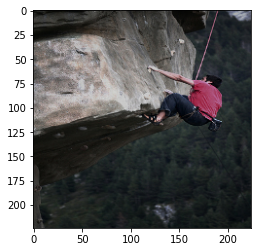

In [ ]:
plt.imshow(image_list[7642])

In [ ]:
import pickle

In [ ]:
os.listdir('./')

['Flicker8k_Dataset',
 '__MACOSX',
 'CrowdFlowerAnnotations.txt',
 'ExpertAnnotations.txt',
 'Flickr8k.lemma.token.txt',
 'Flickr8k.token.txt',
 'Flickr_8k.devImages.txt',
 'Flickr_8k.testImages.txt',
 'Flickr_8k.trainImages.txt',
 'readme.txt']

In [ ]:
os.mkdir('./gmbm_input_flickr')

In [ ]:
with open('./gmbm_input_flickr/image_names','wb') as f:
  pickle.dump(all_images,f)

with open('./gmbm_input_flickr/image_array_list','wb') as f:
  pickle.dump(image_list,f)

In [ ]:
os.listdir('./gmbm_input_flickr/')

['image_names', 'image_array_list']

In [ ]:
import pickle
import nltk
import os
import re
import string

from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
docs=[]
for each_image in all_images:
  current_caption=captions_mapping[each_image]
  docs.append(current_caption)

In [ ]:
print(len(docs))
print(docs[0])

7643
A child in a pink dress is climbing up a set of stairs in an entry way .A girl going into a wooden building .A little girl climbing into a wooden playhouse .A little girl climbing the stairs to her playhouse .A little girl in a pink dress going into a wooden cabin .


In [ ]:
#function to preprocess the words list to remove punctuations
def preprocess(lines):

    
    punctuations = (string.punctuation).replace("'", "") 
    # the character: ' appears in a lot of stopwords and changes meaning of words if removed
    #hence it is removed from the list of symbols that are to be discarded from the documents
    trans_table = str.maketrans('', '', punctuations)
    words = lines.split(" ")
    stripped_words = [word.translate(trans_table) for word in words]
    words = [str for str in stripped_words if str]
    
    words = [word for word in words if not word.isdigit()]
    
    words = [str for str in words if str]
    
    #we also normalize the cases of our words
    words = [word.lower() for word in words]
    words = [word for word in words if not word in stop_words]
    words = [word for word in words if len(word) > 2]
    
    return words

newdocs=[]
for doc in docs:
  newdocs.append(preprocess(doc))

In [ ]:
def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list
    
print("No of docs",len(newdocs))

np_list_of_words = np.asarray(flatten(newdocs))
words, counts = np.unique(np_list_of_words, return_counts=True)
print("No of unique words",len(words))
words=list(words)

No of docs 7643
No of unique words 9895


In [ ]:
print("Total words",len(np_list_of_words))

Total words 235936


In [ ]:
# Following naming convention as image data
save_path='./gmbm_input_flickr/'

with open(save_path+"vocab",'wb')as f2:
  pickle.dump(words,f2)

with open(save_path+"images",'wb')as f3:
  pickle.dump(newdocs,f3)
  
with open(save_path+"np_list_of_words",'wb')as f5:
  pickle.dump(np_list_of_words,f5)
  
#map word2id  
array=[]
M=len(newdocs)
for x1 in range(0,M):
  N=len(newdocs[x1])
  #print(x1)
  for x2 in range(0,N):
    array.append(words.index(newdocs[x1][x2]))
    
with open(save_path+"map_patch_to_id",'wb')as f4:
  pickle.dump(array,f4)

In [ ]:
#Average Length of words per doc
import pickle
%cd '/content/drive/MyDrive/Flickr8K_image/'
save_path='./gmbm_input_flickr/'

with open(save_path+"images",'rb')as f3:
  newdocs=pickle.load(f3)

counts=[]
for d in newdocs:
  counts.append(len(d))

print("No of docs",len(newdocs))
print("Minimum length",min(counts))
print("Maximum length",max(counts))
print("Total words",sum(counts))
print("Average length",sum(counts)/len(newdocs))

/content/drive/MyDrive/Flickr8K_image
No of docs 7643
Minimum length 14
Maximum length 54
Total words 235936
Average length 30.869553840115138


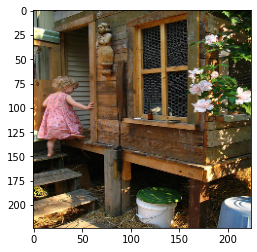

In [ ]:
plt.imshow(image_list[0])

In [ ]:
print(newdocs[0])

['child', 'pink', 'dress', 'climbing', 'set', 'stairs', 'entry', 'way', 'girl', 'going', 'wooden', 'building', 'little', 'girl', 'climbing', 'wooden', 'playhouse', 'little', 'girl', 'climbing', 'stairs', 'playhouse', 'little', 'girl', 'pink', 'dress', 'going', 'wooden', 'cabin']


In [ ]:
save_path='./gmbm_input_flickr/'
with open(save_path+"np_list_of_words",'rb')as f5:
  np_list_of_words=pickle.load(f5)

In [ ]:
from collections import Counter
counts=Counter(np_list_of_words)
print(counts.most_common(25))

[('dog', 7783), ('man', 6771), ('two', 4896), ('white', 3679), ('black', 3589), ('boy', 3374), ('woman', 3154), ('girl', 3101), ('wearing', 2863), ('people', 2694), ('water', 2579), ('red', 2498), ('young', 2449), ('brown', 2433), ('blue', 2128), ('dogs', 1976), ('running', 1961), ('playing', 1888), ('standing', 1688), ('little', 1670), ('shirt', 1663), ('ball', 1644), ('grass', 1504), ('child', 1469), ('person', 1442)]


In [ ]:
for tup in counts.most_common(50):
  print(tup)

('dog', 7783)
('man', 6771)
('two', 4896)
('white', 3679)
('black', 3589)
('boy', 3374)
('woman', 3154)
('girl', 3101)
('wearing', 2863)
('people', 2694)
('water', 2579)
('red', 2498)
('young', 2449)
('brown', 2433)
('blue', 2128)
('dogs', 1976)
('running', 1961)
('playing', 1888)
('standing', 1688)
('little', 1670)
('shirt', 1663)
('ball', 1644)
('grass', 1504)
('child', 1469)
('person', 1442)
('jumping', 1408)
('snow', 1385)
('front', 1300)
('sitting', 1300)
('holding', 1255)
('small', 1229)
('three', 1214)
('large', 1177)
('green', 1173)
('field', 1167)
('yellow', 1153)
('group', 1148)
('walking', 1101)
('one', 1088)
('children', 1059)
('men', 1038)
('near', 975)
('air', 963)
('beach', 950)
('jumps', 931)
('mouth', 918)
('runs', 890)
('another', 878)
('riding', 852)
('street', 840)


In [ ]:
from collections import Counter
counts=Counter(np_list_of_words)
for tup in counts.most_common(100):
  print(tup)

('dog', 7783)
('man', 6771)
('two', 4896)
('white', 3679)
('black', 3589)
('boy', 3374)
('woman', 3154)
('girl', 3101)
('wearing', 2863)
('people', 2694)
('water', 2579)
('red', 2498)
('young', 2449)
('brown', 2433)
('blue', 2128)
('dogs', 1976)
('running', 1961)
('playing', 1888)
('standing', 1688)
('little', 1670)
('shirt', 1663)
('ball', 1644)
('grass', 1504)
('child', 1469)
('person', 1442)
('jumping', 1408)
('snow', 1385)
('front', 1300)
('sitting', 1300)
('holding', 1255)
('small', 1229)
('three', 1214)
('large', 1177)
('green', 1173)
('field', 1167)
('yellow', 1153)
('group', 1148)
('walking', 1101)
('one', 1088)
('children', 1059)
('men', 1038)
('near', 975)
('air', 963)
('beach', 950)
('jumps', 931)
('mouth', 918)
('runs', 890)
('another', 878)
('riding', 852)
('street', 840)
('stands', 827)
('bike', 806)
('girls', 786)
('outside', 743)
('orange', 700)
('looking', 695)
('next', 694)
('play', 694)
('rock', 682)
('pink', 677)
('player', 662)
('pool', 640)
('camera', 639)
('jacke

In [ ]:
import pickle

save_path='./gmbm_input_flickr/'

with open(save_path+"vocab",'rb')as f2:
  words=pickle.load(f2)

In [ ]:
checklist=['dog','cat','run','beach','surfing','sea',\
           'television','watching','person','boy','kid','horse',\
           'riding','food','lunch','dress','fashion','women','men','party','birthday',\
           'mountain','pink','red','park','stadium','match','drink','dining',\
           'bike','car','road','drive','boat','ship','guitar','piano','climbing','bird','surfing',\
           'food','restaurant','fruits','building','monument','flowers','garden']
for ch in checklist:
  if ch in words:
    print(ch,words.index(ch))

dog 2515
cat 1466
run 7154
beach 661
surfing 8516
sea 7328
television 8728
watching 9492
person 6113
boy 1045
kid 4575
horse 4178
riding 6972
food 3353
lunch 4986
dress 2619
fashion 3030
women 9754
men 5147
party 5963
birthday 836
mountain 5344
pink 6216
red 6841
park 5937
stadium 8153
match 5100
drink 2642
dining 2427
bike 802
car 1399
road 7018
drive 2650
boat 950
ship 7496
guitar 3838
piano 6150
climbing 1744
bird 832
surfing 8516
food 3353
restaurant 6924
fruits 3489
building 1189
monument 5292
flowers 3301
garden 3532


# Collage Script

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
import os

In [ ]:
import pickle
import numpy as np

In [ ]:
%cd '/content/drive/MyDrive/Flickr8K_image/'

/content/drive/MyDrive/Flickr8K_image


In [ ]:
with open('./gmbm_input_flickr/image_array_list','rb') as f:
  image_list=pickle.load(f)

In [ ]:
iteration=50
os.listdir('./'+str(iteration))

['BETA_50',
 '50_topics.txt',
 'ksi_50',
 'nihk_50',
 'nigij_50',
 'nigijk_50',
 '50_topics_inline.txt',
 'nih_50',
 'nkj_50',
 'g_50',
 'phiEta_v_50',
 'phikw_50',
 'theta_50',
 'z_50',
 'phi_k_50',
 'pair_k_v_list_50',
 'n_d_s_wcounts_50',
 'np_ksi_50',
 'nk_50']

In [ ]:

theta_path='./'+str(iteration)+'/theta_'+str(iteration)

with open(theta_path,'rb')as f2:
  theta=pickle.load(f2) #dimension N images x H levels x K topics/events

In [ ]:
print(len(image_list),len(theta))

7643 7643


In [ ]:
confidence_theshold=0.99
K=8

K_list=[]
for k in range(K):
  K_list.append([])


for each_image in range(len(theta)):
  #we have set H as 1 in config file
  current_image_theta_prob=theta[each_image][0] # a vector of size K
  index=np.argmax(current_image_theta_prob) # index of maximum probability
  if current_image_theta_prob[index]>=confidence_theshold:
    photo=image_list[each_image] #current image
    K_list[index].append(photo) #image appended to its above topic/event index

In [ ]:
#Total images in each K which satisfies confidence_theshold
for k in range(K):
  print('k is',k,'total counts',len(K_list[k]))

k is 0 total counts 15
k is 1 total counts 36
k is 2 total counts 456
k is 3 total counts 34
k is 4 total counts 39
k is 5 total counts 10
k is 6 total counts 33
k is 7 total counts 42


In [ ]:




H=8
W=10 # no. of images in a row to print 
#images were saved in 224x224 size at the time of preprocess step

collage = Image.new("RGB", (224*W,224*H), color=(255,255,255))


i=0
for x in range(0,224*H,224):
  j=0
  for y in range(0,224*W,224): 
    #print(i,j)  
    try:       
      photo=K_list[i][j]
      photo = Image.fromarray(photo)
      collage.paste(photo, (y,x))
      j+=1
      print((i,j),end=' ')
    except:
      break
  print()
  i+=1
collage.show()



(0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) (0, 7) (0, 8) (0, 9) (0, 10) 
(1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) (1, 7) (1, 8) (1, 9) (1, 10) 
(2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) (2, 7) (2, 8) (2, 9) (2, 10) 
(3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) (3, 7) (3, 8) (3, 9) (3, 10) 
(4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) (4, 7) (4, 8) (4, 9) (4, 10) 
(5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (5, 6) (5, 7) (5, 8) (5, 9) (5, 10) 
(6, 1) (6, 2) (6, 3) (6, 4) (6, 5) (6, 6) (6, 7) (6, 8) (6, 9) (6, 10) 
(7, 1) (7, 2) (7, 3) (7, 4) (7, 5) (7, 6) (7, 7) (7, 8) (7, 9) (7, 10) 


In [ ]:
collage

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
collage.save('./flickr_collage.jpg')

# Checking we are not doing searching

In [ ]:
event_0=sea,surfing
event_1=bike,cycle
event_2=dog
event_3=mountain,climbing
event_4=women,girl
event_5=boat,ship
event_6=kid,child
event_7=player,match

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
import os

In [ ]:
import pickle
import numpy as np

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
%cd '/content/drive/MyDrive/Flickr8K_image/'

/content/drive/MyDrive/Flickr8K_image


In [ ]:
with open('./gmbm_input_flickr/image_array_list','rb') as f:
  image_list=pickle.load(f)

In [ ]:
with open('./gmbm_input_flickr/images','rb') as f:
  docs=pickle.load(f)

In [ ]:
with open('./gmbm_input_flickr/all_captions','rb') as f:
  caption_list=pickle.load(f)

In [ ]:
with open('./gmbm_input_flickr/image_names','rb') as f:
  image_names=pickle.load(f)

In [ ]:
iteration=50
os.listdir('./'+str(iteration))

['theta_50',
 'BETA_50',
 'phiEta_v_50',
 'nk_50',
 '50_topics.txt',
 'ksi_50',
 'np_ksi_50',
 'nihk_50',
 'phi_k_50',
 'nigij_50',
 'pair_k_v_list_50',
 'z_50',
 'phikw_50',
 'nigijk_50',
 'n_d_s_wcounts_50',
 '50_topics_inline.txt',
 'nih_50',
 'nkj_50',
 'g_50']

In [ ]:

theta_path='./'+str(iteration)+'/theta_'+str(iteration)

with open(theta_path,'rb')as f2:
  theta=pickle.load(f2) #dimension N images x H levels x K topics/events

In [ ]:
print(len(image_list),len(caption_list),len(image_names),len(theta),len(docs))

7643 7643 7643 7643 7643


In [ ]:
image_names[:5]

['Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 'Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 'Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 'Flicker8k_Dataset/1003163366_44323f5815.jpg',
 'Flicker8k_Dataset/1007129816_e794419615.jpg']

In [ ]:
print(docs[0])

['child', 'pink', 'dress', 'climbing', 'set', 'stairs', 'entry', 'way', 'girl', 'going', 'wooden', 'building', 'little', 'girl', 'climbing', 'wooden', 'playhouse', 'little', 'girl', 'climbing', 'stairs', 'playhouse', 'little', 'girl', 'pink', 'dress', 'going', 'wooden', 'cabin']


In [ ]:
print(caption_list[0])

A child in a pink dress is climbing up a set of stairs in an entry way .A girl going into a wooden building .A little girl climbing into a wooden playhouse .A little girl climbing the stairs to her playhouse .A little girl in a pink dress going into a wooden cabin .


In [ ]:
confidence_theshold=0.9
K=8

K_list=[]
for k in range(K):
  K_list.append([])


for each_image in range(len(theta)):
  #we have set H as 1 in config file
  current_image_theta_prob=theta[each_image][0] # a vector of size K
  index=np.argmax(current_image_theta_prob) # index of maximum probability
  if current_image_theta_prob[index]>=confidence_theshold:
    photo=image_list[each_image] #current image
    caption=caption_list[each_image]# original caption
    pre_processed_caption_gmbm=docs[each_image]# preprocessed caption of gmbm input
    image_file_name=image_names[each_image].split('/')[1] #filename
    K_list[index].append((photo,caption,pre_processed_caption_gmbm,image_file_name)) #image, orginal and preprocess captions appended to its above topic/event index

In [ ]:
#Total images in each K which satisfies confidence_theshold
for k in range(K):
  print('k is',k,'total counts',len(K_list[k]))

k is 0 total counts 41
k is 1 total counts 118
k is 2 total counts 936
k is 3 total counts 114
k is 4 total counts 155
k is 5 total counts 33
k is 6 total counts 124
k is 7 total counts 145


## Topic 0
guided words=sea,surfing

In [ ]:
#Now lets check whether bike or cycle is present in captions or not
topic_index=0
print(len(K_list[topic_index])) #118 images has probability >=0.9 for topic 5 index

41


In [ ]:
found_images=[]
guided_words_not_in_Captions=[]
for tuple_image_caption in K_list[topic_index]: # tuple is (image,caption)
  tokenized_lowercase_caption=tuple_image_caption[1].lower().split()# 
  if 'sea' not in tokenized_lowercase_caption and  'surfing' not in tokenized_lowercase_caption: #original caption checking
    if 'sea' not in tuple_image_caption[2] and  'surfing' not in tuple_image_caption[2]:         #gmbm input checking
      #print(tuple_image_caption[1])
      guided_words_not_in_Captions.append(tuple_image_caption[1])
      found_images.append(tuple_image_caption[0])


In [ ]:
guided_words_not_in_Captions

['A man drilling a hole in the ice .A man is drilling through the frozen ice of a pond .A person in the snow drilling a hole in the ice .A person standing on a frozen lake .Two men are ice fishing .',
 'A group of eight people are gathered around a table at night .A group of people gathered around in the dark .A group of people sit around a table outside on a porch at night .A group of people sit outdoors together at night .A group of people sitting at a table in a darkened room .',
 'Three individuals are posing on skis behind a " no skiing " sign .Three people in skiing gear are standing behind a " no skiing " sign .Three people on skis are standing behind a no skiing sign .Three people standing in the snow behind a No Skiing sign .Three people stand , ready to ski , next to a no skiing sign .',
 'A boy in a blue shirt jumps down stairs on a skateboard .A man flies through the air on his skateboard above a white staircase .A skateboarder jumps his board down a flight of stairs .A ska

In [ ]:
len(found_images)

25

A man drilling a hole in the ice .A man is drilling through the frozen ice of a pond .A person in the snow drilling a hole in the ice .A person standing on a frozen lake .Two men are ice fishing .


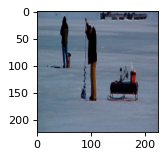

A group of eight people are gathered around a table at night .A group of people gathered around in the dark .A group of people sit around a table outside on a porch at night .A group of people sit outdoors together at night .A group of people sitting at a table in a darkened room .


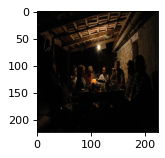

Three individuals are posing on skis behind a " no skiing " sign .Three people in skiing gear are standing behind a " no skiing " sign .Three people on skis are standing behind a no skiing sign .Three people standing in the snow behind a No Skiing sign .Three people stand , ready to ski , next to a no skiing sign .


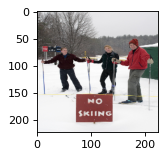

A boy in a blue shirt jumps down stairs on a skateboard .A man flies through the air on his skateboard above a white staircase .A skateboarder jumps his board down a flight of stairs .A skateboarder sails over white steps .Skateboarder jumping down stairs of building .


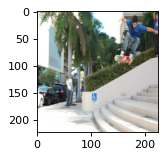

A bunch of people on the beach at sunset .Two people are walking towards a group of people on the beach at sunset .Two people walking along the beach at sunset towarn a group of people .Two people walking along the shore at sunset .Two people walking on the beach at sunset .


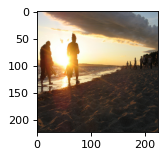

a lone surfboarder on a white surfboard flying through the air over a waveAn surfer airborne over a wave .A surfer is jumping a wave .A surfer jumps a wave .Surfer does trick in wave as seen from behind


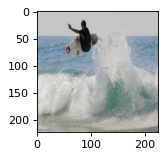

A surfer on a blue surfboard is falling off of it as he hits a wave .a surfer rides up the wave .Man falling off a blue surfboard in the ocean .The surfer is in the wave .The surfer rides a wave on a blue surfboard .


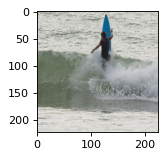

A group of people sit at a table in front of a large building .People are drinking and walking in front of a brick building .People are enjoying drinks at a table outside a large brick building .Two people are seated at a table with drinksTwo people are sitting at an outdoor cafe in front of an old building .


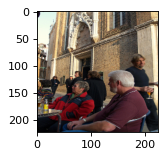

a man falling off of a surfboard in the oceanA surfer flies over a crashing wave .A surfer is falling into a big ocean waveSurfer in black wetsuit falling off his board into the water .The surfer is wiped out by the wave .


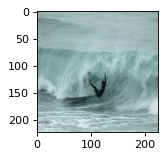

a deer and several turkeys together in the snowA deer looks at 5 turkeys in the snow .Deer and turkeys in the snow .Deer and turkeys stand on snow covered ground .Large turkeys and deer stand in the snow .


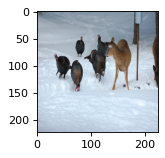

A man stands on a surfboard and coasts down a large wave .A surfer catches a large wave .A surfer rides the waves .a surfer surfs across the large wave .The surfer in the wetsuit is riding a wave .


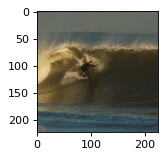

These men are smoking outside a grey building .Two men are standing by a railing , while posing for a picture .Two men in black jackets behind a white handrail .Two men smoking behind a railing .Two men smoking while standing by a rail in front of a building


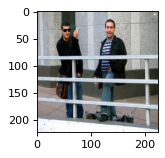

A man rides a skateboard off of a picnic table over the steps .a man skateboard down a railing .A skateboarder is jumping off a wooden table down some steps .Onlookers watch as a man on a skateboard attempts a trick off a table sitting on stairs .People watch as a man does skateboard tricks down a table on the steps .


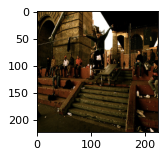

A bird flying over the water .A blue bird flying over water .A gray bird is flying over the water .A large bird spreading his wings in flight over a body of water .A large gray bird begins to land in the water .


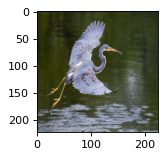

A bare-chested man launches his skateboard off a ramp .A skateboarder attempts a trick with no shirt on .A skateboarder doing a trick on a handrail .a skateboarder grinds the rail .Teen does trick on skateboard while riding the rail .


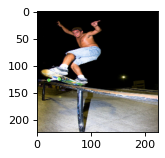

A man in white shorts and a wet-suit top is riding on a bright yellow surfboard .A man on a yellow surfboard rides an easy wave .A man rides a yellow surfboard .A man surfs on a yellow board .Surfer on long yellow board .


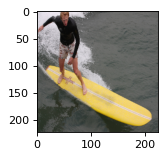

a crowd of people are at the top of steps in front of a white building .A crowd of people dressed for warm weather stand in line in front of a building waiting for something .A group of people standing outside of a building .A large group of people have formed a line outside .A wide line of people .


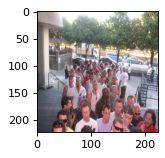

A man in a grey shirt is standing in a crowded street at night .A man stands in a crowd holding a white object .A man with glasses and a grey shirt is on a crowded street .Man wearing pass on a lanyard and standing in a crowd of people .One man with his eyes closed standing in a crowd .


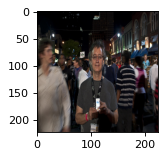

A man in a black wetsuit on a surfboard .A man in black surfs on a wave .A surfer is on a wave .A surfer catches a good sized wave .Man catching a large wave on a surfboard .


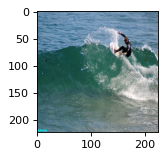

A person in a white shirt grinding a skateboard down a long rail in a skate park .A person in a white shirt skateboarding off a rail .A skateboarder grinds down a long rail .A skateboarder rides down a rail .A skateboarder riding a rail .


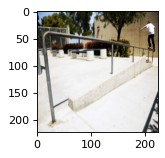

A crowd of people are walking down a city street .A group a people walk around the corner near a brick building .A group of people stands in front of a yellow building .People gather together outdoors .The people walk near a brick building .


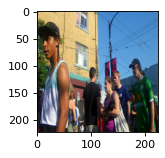

A surfer catching a big wave in the ocean .A surfer going through a wave .A surfer in water and foam .A surfer rides the crashing waves .The surfer catches a big wave but stays on his board .


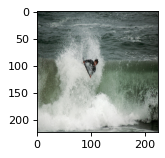

A surfboarder catches the waves .A surfer in a green striped wetsuit rides a wave .a surfer is riding the waves whilst another surfer sits on his board waiting .A surfer wearing a black and green wetsuit riding a wave .The surfer is riding the wave .


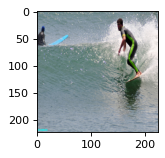

A group of four men sits at a table on a platform before an audience in a darkened room .A group of people sit on a panel on a stage with a crowd watching .Four people are sitting at a table in front of an audience .Four people sitting behind a table .Several people sit at a lit table in front of a crowd


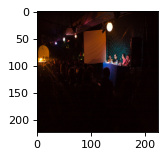

a man fishes in the ocean .A man fly fishes in the ocean .A man fly fishing .A man is fishing in knee-high waves of water .The person is fishing , with waves splashing around him .


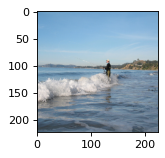

In [ ]:
for i in range(len(found_images)):
  figure(figsize=(2, 2), dpi=80)
  plt.imshow(found_images[i])
  print(guided_words_not_in_Captions[i])
  plt.show()

In [ ]:
H=3
W=10

collage = Image.new("RGB", (224*W,224*H), color=(255,255,255))
topic_index = 1
count=0

for x in range(0,224*H,224):
  for y in range(0,224*W,224): 
    photo=found_images[count] 
    photo = Image.fromarray(photo)
    collage.paste(photo, (y,x))
    count+=1
    if count==len(found_images):
      break
collage

Output hidden; open in https://colab.research.google.com to view.

## Topic 1
guided words=bike,cycle

In [ ]:
#Now lets check whether bike or cycle is present in captions or not
topic_index=1
print(len(K_list[topic_index])) #118 images has probability >=0.9 for topic 1 index

118


In [ ]:
found_images=[]
guided_words_not_in_Captions=[]
for tuple_image_caption in K_list[topic_index]: # tuple is (image,caption)
  tokenized_lowercase_caption=tuple_image_caption[1].lower().split()# 
  if 'bike' not in tokenized_lowercase_caption and  'cycle' not in tokenized_lowercase_caption: #original caption checking
    if 'bike' not in tuple_image_caption[2] and  'cycle' not in tuple_image_caption[2]:         #gmbm input checking
      #print(tuple_image_caption[1])
      guided_words_not_in_Captions.append(tuple_image_caption[1])
      found_images.append(tuple_image_caption[0])

In [ ]:
len(found_images)

45

A bicycle rider is crossing a street .A bicyclist getting ready to cross a street .A biker in spandex riding on a busy street .A man in blue and white biking gear rides down a busy street .a man wearing a helmet riding his bicycle down the street .


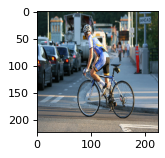

A man wearing a red helmet jumps up while riding a skateboard .A young man wearing a red jacket performs a jump on a red skateboard .The helmeted boy is doing a stunt on a skateboard .The young man is skateboarding at a skate park .Young man is performing a trick on a skateboard in a park .


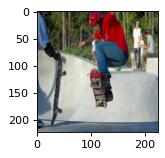

A guy skateboarding on midair .A man on a skateboard doing a jump over concrete .A man on a skateboard is jumping in the air with it .Skateboarder in the air .The guy in the blue shirt and jeans performs a grab trick on his skateboard .


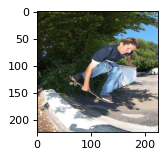

a man doing tricks on a motorcycleA man puts his motorcycle up on its rear wheel on a track .A man riding a motorcycle is performing a trick at a track .A man stands on his motorcycle while doing a wheelie .The motorcycle is being ridden on a track whilst pulling a wheelie .


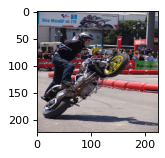

A guy riding a motorcycle on one wheel .A man with a red helmet in doing a trick on a gray motorcycle .A motorcyclist pops a wheelie .A person on a motorcycle popping a wheelie in a parkinglot .Person doing a trick wheelie on a motorcycle .


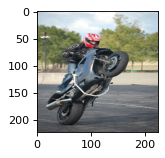

A group of bicyclists in a race .A group of people in a bicycle race .A group of people ride bicycles around a curve on a racetrack .Group of cyclists in riding gear with helmets .Men race on bicycles on track .


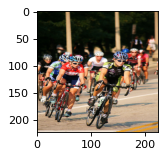

A boy does a skateboard trick off a metal plank .a guy with no shirt on is skateboarding .A young man jumps in the air on a skateboard .Skateboarder on a rail .Skater does a trick on a rail .


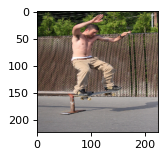

A man racing an orange motorcycle .A man riding an orange and white motorcycle .A motorcyclist races around a track .An orange and white motorcycle is being ridden on a racetrack .Someone is driving an orange motorbike along pavement .


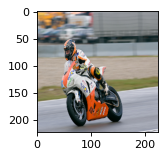

A green motorcycle is being ridden on a wet racetrack .a man on a race bikeA man rides a green motorcycle on a wet racetrack .A motorcycle racer is turning around a curve on a wet road .Person riding a green racing motorcycle .


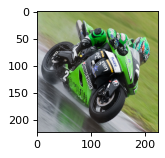

A biker rides a motorcycle on a racetrackA man races a blue motorcycle on a track .A motorcycle rider turns the motorcycle on its side while racing .A motorcyclist takes a corner .A race car driver in a Yamaha bicycle is turning on a racetrack .


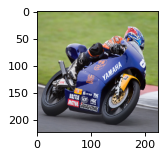

A man is skateboarding up a ramp .A skateboarder hits a curve at the top of the skate park .The man in a white shirt is skateboarding .The man performs tricks on his skateboard in the skateboarding park .The skateboarder in the white t-shirt is riding on a wooden ramp .


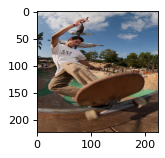

A blue buggy is driving across the sand dunes .A blue go cart in the dirt pointing downhill .A dune buggy goes down a hill .A dune buggy going down a sandy hill .A dune buggy traveling on sand .


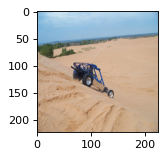

A black and white motorcycle is being ridden around a racetrack .A man on a motorcycle is racing on a track .A motorcycle racer speeds down a track .A orange , white , and black motorcyclist racing .A professional motor racer in motion .


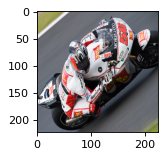

A boy does a skateboard trick .A man jumps in the air on his skateboard .A skateboarder doing a maneuver in the air .the skateboarder jumps into the air .The young man catches some air while skateboarding .


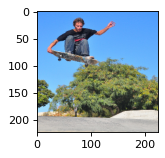

A guy on a skateboard is doing a stunt at night .A man wearing green jumps with his skateboard in the street .A skateboarder jumping a traffic cone .A young man taking a jump on a skateboard .The skateboarder does a jump near a traffic cone .


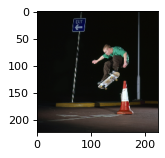

A boy on a skateboard is at the top of a ramp .A person in a plaid shirt riding a skateboard on a half-pipe .A skateboarder on a ramp .Person in plaid shirt make a jump on a skateboard on a ramp .The boy safely skates up the ramp before descending again .


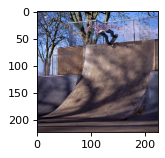

A man in a red shirt is doing a trick with his skateboard .A man wearing a red shirt is skateboarding .A skateboarder is performing a trick in the air .A skateboarder jumps in the air .Person doing a skateboard trick in midair .


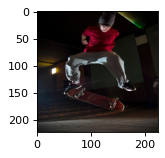

A man performs a skateboard trick in a parking lot .A person on a skateboard during a high jump .a skateboarder is airborne in front of some low brick buildings .A skateboarder is flying through the air on a red skateboard .A skateboarding soaring through the air in front of a blue building .


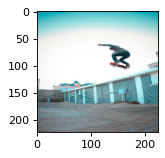

A man performing a skateboard jump off the top of a ramp .A skateboarder becomes airborne at the top of a black and yellow ramp .A skateboarder does a trick on a black and yellow striped ramp .Skateboarder flying over ramp outside .This man is doing a stunt on a skateboard outdoors .


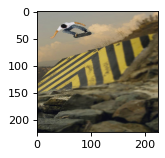

A man is in midair at a skate park .A man is pulling tricks on his rollerblades in a indoor skate park .A man rollerblading at a skate park .A rollerblader does a trick at a skate parkInline skater taking a jump .


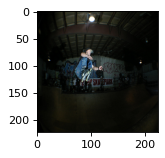

A person in a red shirt on a skateboard .A person riding a skateboard .A teenage male grinds on his skateboard .The skateboarder does a trick on a ramp .While doing tricks , the skateboarder is at the top of the half pipe .


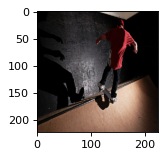

In [ ]:
for i in range(len(found_images)):
  figure(figsize=(2, 2), dpi=80)
  plt.imshow(found_images[i])
  print(guided_words_not_in_Captions[i])
  plt.show()
  if i==20:
    break

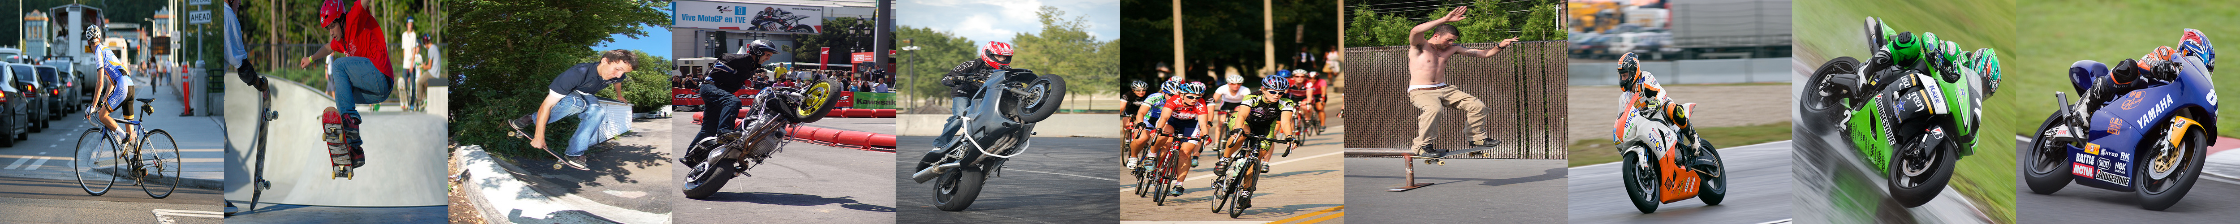

In [ ]:
H=1
W=10

collage = Image.new("RGB", (224*W,224*H), color=(255,255,255))
topic_index = 1
count=0

for x in range(0,224*H,224):
  for y in range(0,224*W,224): 
    photo=found_images[count] 
    photo = Image.fromarray(photo)
    collage.paste(photo, (y,x))
    count+=1
collage

## Topic 7
guided words=player,match

In [ ]:
#Now lets check whether bike or cycle is present in captions or not
topic_index=7
print(len(K_list[topic_index])) #145 images has probability >=0.9 for topic 7 index

145


In [101]:
found_images=[]
guided_words_not_in_Captions=[]
for tuple_image_caption in K_list[topic_index]: # tuple is (image,caption)
  tokenized_lowercase_caption=tuple_image_caption[1].lower().split()# 
  if 'player' not in tokenized_lowercase_caption and  'match' not in tokenized_lowercase_caption: #original caption checking
    if 'player' not in tuple_image_caption[2] and  'match' not in tuple_image_caption[2]:         #gmbm input checking
      #print(tuple_image_caption[2])
      guided_words_not_in_Captions.append(tuple_image_caption[1])
      found_images.append(tuple_image_caption[0])

In [ ]:
len(found_images)

39

A boys baseball team wear their uniforms .A small boy smiles as he stands with others wearing the same black hats .Children sporting their Florida Dolphin caps .The boys are all wearing the same baseball hats .Three boys wearing Florida Marlins hats .


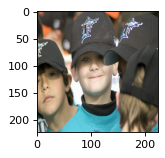

A bunch of kids run on a school play field .A group of children in a field .A group of children running in the grass .Kids play soccer on a field .Kids running in the field .


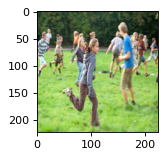

Two boys in a field kicking a soccer ball .Two children are playing with a soccer ball on grass .Two children playing with a ball on the grass .Two children play soccer in the park .Two little boys are playing outside with their soccer ball on the green grass .


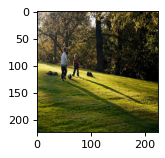

A group of boys play flag football while some bystanders watch .Kids playing tag football .several boys playing flag football in blue and white uniformsSome boys in team uniforms are outside playing sports while people watch .Young boys play touch football .


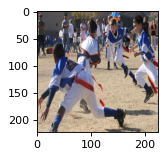

A goalie tries to catch a ball during a soccer game .A group of guys playing soccer on a field .Footballers are scrambling around the goal as the goal keeper reaches for the ball .Four men in green at a soccer goal post trying to score , while 3 men in blue try to prevent it .Two soccer teams converge at the goal and the goalie reaches for the ball .


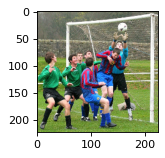

Boys and adults at a soccer game .Children playing soccer on a field while parents watch .Two kids are photographed playing soccer in a field .Two kids are running in a soccer game .Young boys are running around a field during a soccer game .


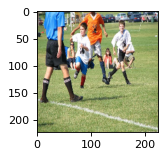

Children play basketball on a court .four young boys play basketball .Several children are playing a basketball game on a basketball court .Three small boys play basketball indoors .Three small boys playing basketball .


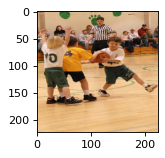

One boy in a black shirt is grabbing the flag of the boy in the red shirt with the football .Two boys are playing flag football .Two boys playing a game of flag football .Two boys with mouthguards and one is holding a football while the other reaches for him .Young football players with mouthguards .


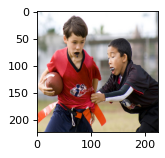

Boy in a black and white soccer uniform kicking the ball with other players nearby .Children playing soccer , one in the process of kicking the ball .The boy in the white shirt dribbles the soccer ball away from the yellow and blue team .There are five young boys on a soccer field running and playing soccer .Two young soccer teams competing in a game .


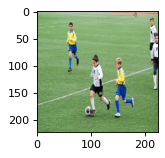

a crowd wearing red , cheers on the red football team .Football players in red congratulate each other as crowds in red cheer behind .The Oklahoma Sooners football team discuss their game while fans cheer .Two football players talk during a game .Two Oklahoma Sooner football players talk on the sideline .


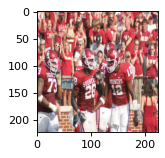

A group of football players running down the field .The crowd is watching a football game .The football players in red are attempting a play against those in purple , white , and gold .The man in red has the football , and the team in white is nearby .Three Oklahoma Sooners playing football against another team , one of the sooners with the ball in their possession .


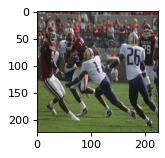

A blue and white soccer team playing against each other .kids running after soccer ball in their gameTwo boys playing soccer go after a ball .Two soccer ball players are chasing after the ball .Young boys playing soccer .


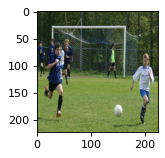

A goalie is guarding the goal .Kids in helmets play hockey outside .Several players playing a game of hockey outside on the road .Some children play hockey outside .Two children play street hockey in front of a goal .


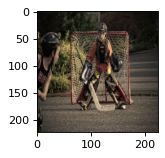

Two boys show off their stained , blue tongues .Two boys with wearing baseball caps are sticking out green stained tongues .Two kids are sticking their blue and green colored tongues out .Two young boys wearing collared shirts and baseball caps have their blue-tinted tongues stuck out .Two young boys wearing hats and sticking their colored tongues out .


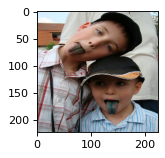

A group of soccer players after a ball .A soccer game between the red team and the blue team .A soccer game is in progress .Soccer game with teams in red and blue .two teams of soccer players playing a game on a field


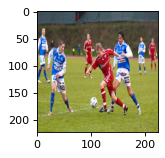

Two girls are playing soccer with orange and white uniforms .Two girls in jerseys running toward a soccer ballTwo girls in red jerseys playing soccerTwo girls in red soccer uniforms running after a soccer ball .Two little girls in red and white strips are chasing after a soccer ball .


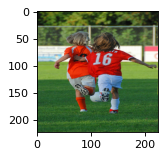

A group of basketball players wearing yellow and green reach for a ball .Basketball players shoot for a goal during a game .Four men jumping in a basketball gameIn this picture all men from both basketball teams with red and green jerseys are jumping .The man on the yellow basketball team tries to score while the men on the opposing team try to block his shot .


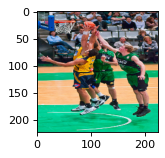

A group of little boys play football in uniforms .Children in uniforms , pads and halmets play footballFour children , in uniforms of two different teams , are playing football .Four young boys dressed in uniform play football .Two boys ' football teams compete on the field .


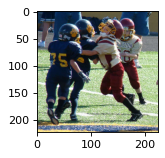

The men are playing soccer while people in the stands watch .Three men , from two teams , are in the air colliding and there is a soccer ball above them .Three soccer players collide in a rush for the ball .Two soccer teams compete .two trams of soccer players playing a game on the field


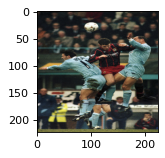

A man in a white shirt and blue shorts and a man in a red shirt and white shorts playing soccer .Two men fighting for control of a soccer ball as fans watchTwo players hustle during a soccer game .Two soccer players fighting for the ball .Two soccer players rush to kick the ball .


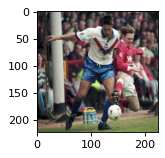

Two boys fight for the ball .two field hockey players fight for the ball .Two hockey players are trying to shoot the puck on the grass .Two opposing male players are chasing the ball in field hockey .Two teenagers participate in a game of field hockey .


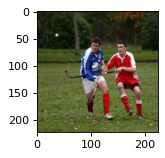

In [ ]:
for i in range(len(found_images)):
  figure(figsize=(2, 2), dpi=80)
  plt.imshow(found_images[i])
  print(guided_words_not_in_Captions[i])
  plt.show()
  if i==20:
    break

In [ ]:
H=2
W=10

collage = Image.new("RGB", (224*W,224*H), color=(255,255,255))
topic_index = 1
count=0

for x in range(0,224*H,224):
  for y in range(0,224*W,224): 
    photo=found_images[count] 
    photo = Image.fromarray(photo)
    collage.paste(photo, (y,x))
    count+=1
collage

Output hidden; open in https://colab.research.google.com to view.